In [2]:
import cdsapi

In [3]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'seasonal-monthly-single-levels',
    {
        'format': 'grib',
        'originating_centre': 'ecmwf',
        'system': '51',
        'variable': '2m_temperature',
        'product_type': 'ensemble_mean',
        'year': '2023',
        'month': '03',
        'leadtime_month': '1',
    },
    'download_ec.grib')

2023-06-11 15:43:03,873 INFO Welcome to the CDS
2023-06-11 15:43:03,876 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2023-06-11 15:43:04,066 INFO Request is queued
2023-06-11 15:43:05,142 INFO Request is completed
2023-06-11 15:43:05,144 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data2/adaptor.mars.external-1686490986.297096-21253-11-a6bb1f08-cfcd-4fe0-9c23-df320e7ccf19.grib to download_ec.grib (126.8K)
2023-06-11 15:43:07,138 INFO Download rate 63.6K/s                                                                                                                                                          


Result(content_length=129840,content_type=application/x-grib,location=https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data2/adaptor.mars.external-1686490986.297096-21253-11-a6bb1f08-cfcd-4fe0-9c23-df320e7ccf19.grib)

In [56]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'seasonal-monthly-single-levels',
    {
        'format': 'grib',
        'originating_centre': 'ukmo',
        'system': '601',
        'variable': '2m_temperature',
        'product_type': 'ensemble_mean',
        'year': '2023',
        'month': '02',
        'leadtime_month': '2',
    },
    'download_ukmo.grib')

2023-03-06 21:47:24,230 INFO Welcome to the CDS
2023-03-06 21:47:24,233 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2023-03-06 21:47:24,335 INFO Request is queued
2023-03-06 21:47:32,767 INFO Request is running
2023-03-06 21:47:37,908 INFO Request is completed
2023-03-06 21:47:37,911 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data6/adaptor.mars.external-1678135660.8759193-1230-6-6c5bd18f-e0d6-476f-a42f-b0b5977f1bf4.grib to download_ukmo.grib (190.1K)
2023-03-06 21:47:38,459 INFO Download rate 347.7K/s


Result(content_length=194640,content_type=application/x-grib,location=https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data6/adaptor.mars.external-1678135660.8759193-1230-6-6c5bd18f-e0d6-476f-a42f-b0b5977f1bf4.grib)

In [64]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'seasonal-monthly-single-levels',
    {
        'format': 'grib',
        'originating_centre': 'ukmo',
        'system': '601',
        'variable': '2m_temperature',
        'product_type': [
            'ensemble_mean', 'hindcast_climate_mean',
        ],
        'year': '2023',
        'month': '02',
        'leadtime_month': '2',
    },
    'download_ukmo_clim.grib')

2023-03-06 22:02:27,386 INFO Welcome to the CDS
2023-03-06 22:02:27,388 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2023-03-06 22:02:27,485 INFO Request is queued
2023-03-06 22:03:00,254 INFO Request is completed
2023-03-06 22:03:00,256 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data5/adaptor.mars.external-1678136587.1721885-13122-17-25b83532-57b5-4b01-ae90-c4f02455931d.grib to download_ukmo_clim.grib (380.2K)
2023-03-06 22:03:00,821 INFO Download rate 674.9K/s


Result(content_length=389280,content_type=application/x-grib,location=https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data5/adaptor.mars.external-1678136587.1721885-13122-17-25b83532-57b5-4b01-ae90-c4f02455931d.grib)

In [11]:
import xarray as xr

In [68]:
fc_hc = xr.open_dataset('download_ukmo_clim.grib',engine ="cfgrib",filter_by_keys={'dataType': 'hcmean'})
fc = xr.open_dataset('download_ukmo_clim.grib',engine ="cfgrib",filter_by_keys={'dataType': 'em'})

In [70]:
fc - fc_hc

<xarray.Dataset>
Dimensions:     (latitude: 180, longitude: 360)
Coordinates:
    number      int64 0
    time        datetime64[ns] 2023-02-01
    step        timedelta64[ns] 59 days
    surface     float64 0.0
  * latitude    (latitude) float64 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude   (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    valid_time  datetime64[ns] 2023-04-01
Data variables:
    t2m         (latitude, longitude) float32 0.1844 0.1979 ... 0.03098 0.01192

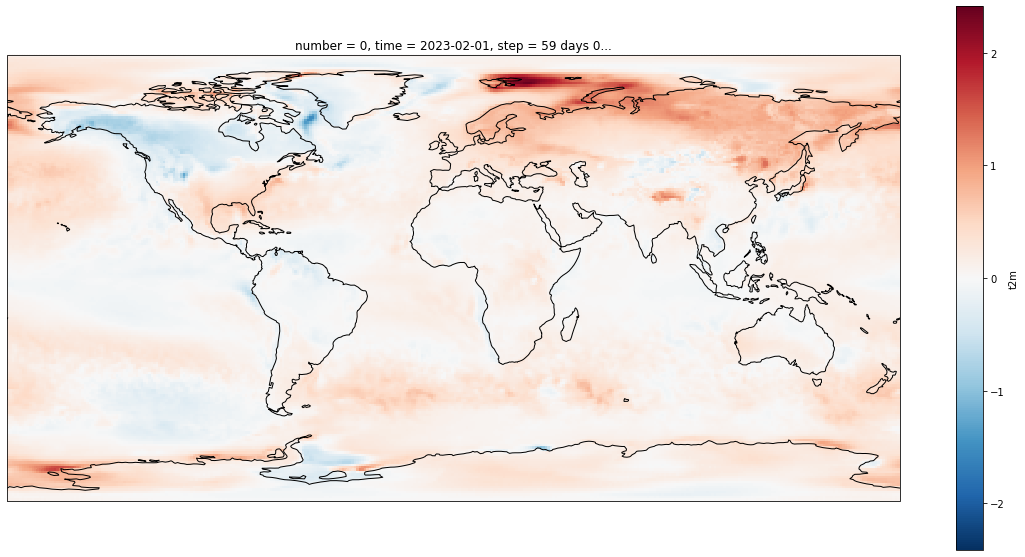

In [71]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))

(((fc-fc_hc)/fc_hc)*100.0)['t2m'].plot(ax=ax)

ax.coastlines()

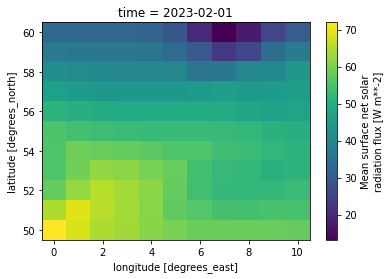

In [7]:
fc['msnsrf'].plot()

In [57]:
fc_ec = xr.open_dataset('download_ec.grib')
fc_ukmo = xr.open_dataset('download_ukmo.grib')

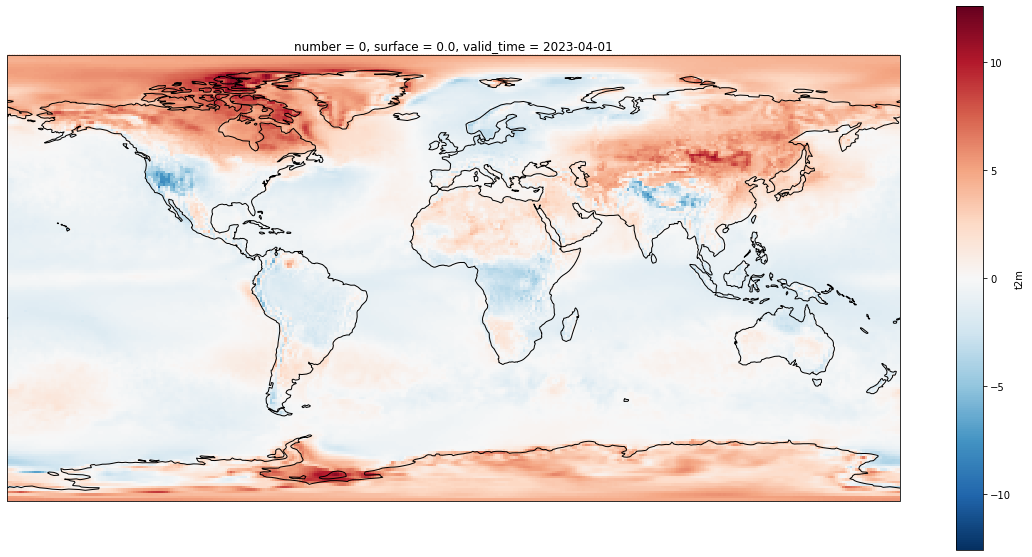

In [63]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))

(fc_ec-fc_ukmo).t2m.plot(ax=ax)
ax.coastlines()

In [72]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'derived-near-surface-meteorological-variables',
    {
        'version': '2.1',
        'format': 'zip',
        'variable': 'surface_downwelling_shortwave_radiation',
        'reference_dataset': 'cru',
        'year': '2019',
        'month': '07',
    },
    'download.zip')

2023-03-06 22:10:20,228 INFO Welcome to the CDS
2023-03-06 22:10:20,230 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/derived-near-surface-meteorological-variables
2023-03-06 22:10:20,569 INFO Request is queued
2023-03-06 22:10:21,654 INFO Request is running
2023-03-06 22:10:25,571 INFO Request is completed
2023-03-06 22:10:25,574 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data9/dataset-derived-near-surface-meteorological-variables-831068dd-252f-4dfd-82eb-04bc2b460809.zip to download.zip (114.2M)
2023-03-06 22:11:38,242 INFO Download rate 1.6M/s  


Result(content_length=119766552,content_type=application/zip,location=https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data9/dataset-derived-near-surface-meteorological-variables-831068dd-252f-4dfd-82eb-04bc2b460809.zip)

In [73]:
fc = xr.open_dataset('SWdown_WFDE5_CRU_201907_v2.1.nc')

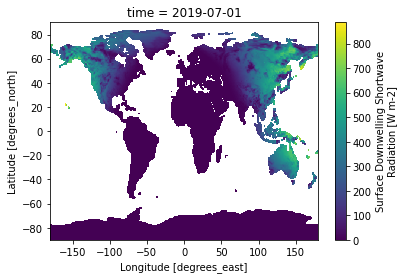

In [75]:
fc.isel(time=0)['SWdown'].plot()

In [76]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'insitu-observations-surface-marine',
    {
        'format': 'csv-obs.zip',
        'year': '1851',
        'month': '01',
        'day': '01',
        'data_quality': 'passed',
        'variable': [
            'air_temperature', 'wind_speed',
        ],
    },
    'download.csv-obs.zip')

2023-03-06 22:22:13,909 INFO Welcome to the CDS
2023-03-06 22:22:13,912 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-observations-surface-marine
2023-03-06 22:22:14,094 INFO Request is queued
2023-03-06 22:22:15,172 INFO Request is running
2023-03-06 22:22:19,073 INFO Request is completed
2023-03-06 22:22:19,076 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data0/adaptor.glamod.retrieve-1678137739.4989538-23944-12-4116ed78-33e2-41bb-9b50-3a2c31dca693.zip to download.csv-obs.zip (1.3K)
2023-03-06 22:22:19,386 INFO Download rate 4K/s


Result(content_length=1280,content_type=application/zip,location=https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data0/adaptor.glamod.retrieve-1678137739.4989538-23944-12-4116ed78-33e2-41bb-9b50-3a2c31dca693.zip)

In [77]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'sis-shipping-consumption-on-routes',
    {
        'format': 'zip',
        'variable': [
            'fuel_consumption_at_fixed_shaft_power', 'fuel_consumption_at_fixed_speed', 'shaft_power_at_fixed_speed',
            'ship_speed_at_fixed_shaft_power', 'trip_duration_at_fixed_shaft_power',
        ],
        'product_type': 'historical',
        'statistic': 'daily',
        'departure_port': 'gibraltar',
        'arrival_port': 'new_york',
        'year': '2017',
    },
    'download.zip')

2023-03-06 22:33:31,857 INFO Welcome to the CDS
2023-03-06 22:33:31,860 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-shipping-consumption-on-routes
2023-03-06 22:33:31,986 INFO Request is queued
2023-03-06 22:33:33,066 INFO Request is running
2023-03-06 22:33:34,654 INFO Request is completed
2023-03-06 22:33:34,656 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data6/dataset-sis-shipping-consumption-on-routes-3c7fc208-15f6-48e2-bbc0-2562518400e3.zip to download.zip (565.1K)
2023-03-06 22:33:35,352 INFO Download rate 813.2K/s


Result(content_length=578636,content_type=application/zip,location=https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data6/dataset-sis-shipping-consumption-on-routes-3c7fc208-15f6-48e2-bbc0-2562518400e3.zip)

In [78]:
fc = xr.open_dataset(r'./download/shaft_power_fixed_speed_historical_daily_product_tanker_from_gibraltar_to_new_york_2017_v0.0.nc')

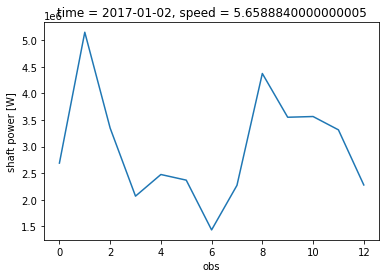

In [89]:
fc.isel(time=1).isel(speed=1)['shaft_power'].plot()

In [98]:
fc.sel(lat=-7.01)

ValueError: dimensions or multi-index levels ['lat'] do not exist

In [99]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'seasonal-postprocessed-single-levels',
    {
        'format': 'grib',
        'year': '2023',
        'originating_centre': 'ecmwf',
        'system': '51',
        'product_type': 'monthly_mean',
        'month': '03',
        'leadtime_month': [
            '1', '2', '3',
            '4', '5', '6',
        ],
        'area': [
            60, 0, 40,
            20,
        ],
        'variable': [
            '10m_wind_speed_anomaly', '2m_temperature_anomaly', 'surface_solar_radiation_anomalous_rate_of_accumulation',
        ],
    },
    'download.grib')

2023-03-07 20:40:18,575 INFO Welcome to the CDS
2023-03-07 20:40:18,578 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-postprocessed-single-levels
2023-03-07 20:40:19,128 INFO Request is queued
2023-03-07 20:40:32,681 INFO Request is running
2023-03-07 20:41:08,987 INFO Request is completed
2023-03-07 20:41:08,990 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data2/adaptor.mars.external-1678218031.8210607-6380-10-d562bc96-751c-4d5c-be0b-6e86e087ee88.grib to download.grib (968.2K)
2023-03-07 20:41:10,993 INFO Download rate 483.7K/s


Result(content_length=991440,content_type=application/x-grib,location=https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data2/adaptor.mars.external-1678218031.8210607-6380-10-d562bc96-751c-4d5c-be0b-6e86e087ee88.grib)

In [136]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'seasonal-postprocessed-single-levels',
    {
        'format': 'grib',
        'originating_centre': 'ukmo',
        'system': '601',
        'variable': '2m_temperature_anomaly',
        'product_type': 'monthly_mean',
        'year': '2023',
        'month': '02',
        'leadtime_month': [
            '1', '2', '3',
            '4', '5', '6',
        ],
        'area': [
            60, 0, 40,
            20,
        ],
    },
    'download_uk.grib')

2023-03-07 21:22:31,893 INFO Welcome to the CDS
2023-03-07 21:22:31,895 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-postprocessed-single-levels
2023-03-07 21:22:32,010 INFO Request is queued
2023-03-07 21:22:53,252 INFO Request is running
2023-03-07 21:23:21,889 INFO Request is completed
2023-03-07 21:23:21,892 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data1/adaptor.mars.external-1678220574.862339-25416-7-9b5ea9e6-daca-4c7b-8836-61d951b8638a.grib to download_uk.grib (566.7K)
2023-03-07 21:23:22,645 INFO Download rate 754K/s 


Result(content_length=580320,content_type=application/x-grib,location=https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data1/adaptor.mars.external-1678220574.862339-25416-7-9b5ea9e6-daca-4c7b-8836-61d951b8638a.grib)

In [147]:
fc = xr.open_dataset('download_uk.grib')

In [148]:
fc

<xarray.Dataset>
Dimensions:     (latitude: 21, longitude: 21, number: 62, step: 184, time: 31)
Coordinates:
  * number      (number) int64 0 1 2 3 4 5 6 7 8 ... 53 54 55 56 57 58 59 60 61
  * time        (time) datetime64[ns] 2023-01-02 2023-01-03 ... 2023-02-01
  * step        (step) timedelta64[ns] 28 days 29 days ... 210 days 211 days
    surface     float64 ...
  * latitude    (latitude) float64 60.0 59.0 58.0 57.0 ... 43.0 42.0 41.0 40.0
  * longitude   (longitude) float64 0.0 1.0 2.0 3.0 4.0 ... 17.0 18.0 19.0 20.0
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2a         (number, time, step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             egrr
    GRIB_centreDescription:  U.K. Met Office - Exeter
    GRIB_subCentre:          98
    Conventions:             CF-1.7
    institution:             U.K. Met Office - Exeter
    history:                 2023-03-07T21:27 GRIB to CDM+CF via cfgrib-0.9.9...

In [151]:
import matplotlib.pyplot as plt
lat = xr.DataArray([51.], dims="z")
lon = xr.DataArray([4.], dims="z")
df = fc.interp(latitude=lat,longitude=lon)

(array([150., 324., 588., 769., 374., 282.,  96.,  42.,  17.,   4.]),
 array([-2.228482  , -1.4202138 , -0.6119455 ,  0.19632271,  1.004591  ,
         1.8128592 ,  2.6211274 ,  3.4293957 ,  4.2376637 ,  5.0459323 ,
         5.8542004 ], dtype=float32),
 <BarContainer object of 10 artists>)

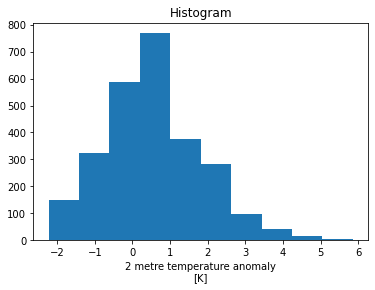

In [159]:
fc['t2a'].isel(dict(number=0,)).plot()

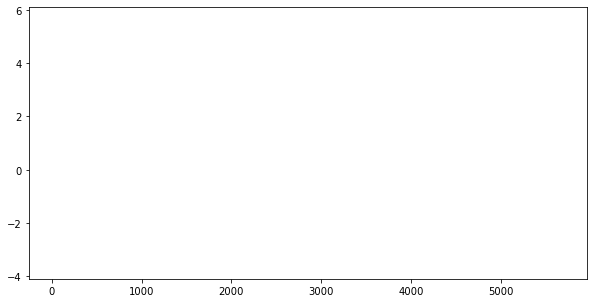

In [140]:
import matplotlib.pyplot as plt
lat = xr.DataArray([51], dims="z")
lon = xr.DataArray([4], dims="z")
df = fc.interp(latitude=lat,longitude=lon).to_dataframe().reset_index()#.pivot(columns=['number'],values=['t2a'])

fig,ax = plt.subplots(figsize=(10,5))
numbers = df.number.unique()

for n in numbers:
    ax.plot(df.loc[df.number==n]['t2a'].values)



In [141]:
df

,number,step,time,z,surface,valid_time,t2a,latitude,longitude
0,0,28 days,2023-01-02,0,0.0,2023-01-30,NaN,51,4
1,0,28 days,2023-01-03,0,0.0,2023-01-31,NaN,51,4
2,0,28 days,2023-01-04,0,0.0,2023-02-01,NaN,51,4
3,0,28 days,2023-01-05,0,0.0,2023-02-02,NaN,51,4
4,0,28 days,2023-01-06,0,0.0,2023-02-03,NaN,51,4
...,...,...,...,...,...,...,...,...,...
353643,61,211 days,2023-01-28,0,0.0,2023-08-27,NaN,51,4
353644,61,211 days,2023-01-29,0,0.0,2023-08-28,NaN,51,4
353645,61,211 days,2023-01-30,0,0.0,2023-08-29,NaN,51,4
353646,61,211 days,2023-01-31,0,0.0,2023-08-30,NaN,51,4


In [114]:
import xarray as xr

# Maak een xarray-object met ontbrekende waarden
ds = xr.Dataset({
    'x': xr.DataArray([0, 1, 2, 3], dims='x'),
    'y': xr.DataArray([0, 1, 2, 3], dims='y'),
    'data': xr.DataArray([[1, 2, 3, 4], [5, 6, 7, float('nan')], [9, 10, float('nan'), 12], [13, 14, 15, 16]], dims=('y', 'x'))
})

# Interpoleer het xarray-object naar een nieuw rooster met ontbrekende waarden
new_coords = {'x': [0.5, 1.5, 2.5], 'y': [0.5, 1.5, 2.5]}
ds_interp = ds.fillna(ds.interp(new_coords))

# Bekijk het resultaat
print(ds_interp)

<xarray.Dataset>
Dimensions:  (x: 4, y: 4)
Coordinates:
  * x        (x) int64 0 1 2 3
  * y        (y) int64 0 1 2 3
Data variables:
    data     (y, x) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 12.0 13.0 14.0 15.0 16.0
